In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import math
import turtle
import time

# 线性回归可解释性 — 皇帝的新衣

In [2]:
df = pd.read_csv("./data/boston.csv")
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [3]:
df.drop("CHAS", axis=1, inplace=True)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
reg = LinearRegression(fit_intercept=False)

In [7]:
beta_1 = []
for column in X.columns:
    x = np.array(X[column]).reshape(-1, 1)
    reg.fit(x, y)
    beta_1.extend(reg.coef_)

In [8]:
reg.fit(X, y)
beta_m = reg.coef_

In [9]:
estimate_result = pd.DataFrame(
    {
        "Var": X.columns,
        "Univariate": beta_1,
        "Multivariate": beta_m
    }
)

In [10]:
estimate_result

,Var,Univariate,Multivariate
0,CRIM,0.584192,-0.098157
1,ZN,0.495863,0.049416
2,INDUS,1.289376,0.016628
3,NOX,37.511009,-2.255775
4,RM,3.653350,5.998046
5,AGE,0.263555,-0.005146
6,DIS,4.798467,-0.972546
7,RAD,1.106776,0.193115
8,TAX,0.043455,-0.010870
9,PTRATIO,1.175159,-0.425742


In [11]:
_estimate_result = estimate_result.melt(id_vars=["Var"], var_name="Model", value_name="Coef")

Text(0.5, 1.0, 'Coefficients of Univariate and Multivariate')

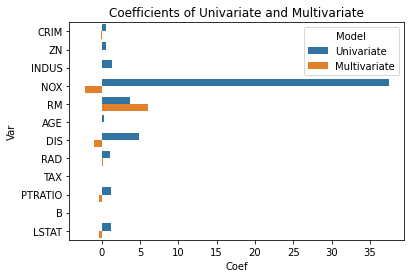

In [12]:
sns.barplot(x="Coef", y="Var", hue="Model", data=_estimate_result).set_title("Coefficients of Univariate and Multivariate")

因此，多重回归不具有可解释性，仅当 $X$ 为正交矩阵时， 两者相等。

## 基本编程训练（一）

1. 编写一个函数, 类似于(但简单些) R 的 `seq( )`, 展示从 `From` 到 `To` 的序列, 如果 `by` 有值, 则其绝对值为步长. 不用任何非基本函数.

In [13]:
def seq(start, end, step=1):
    seq = []
    length = int(abs((start - end) // step))
    step = - step if start > end else step
    for i in range(length):
        seq.append(start)
        start = start + step
    return seq

In [14]:
seq(3, -1, .5)

[3, 2.5, 2.0, 1.5, 1.0, 0.5, 0.0, -0.5]

In [15]:
seq(5, 1)

[5, 4, 3, 2]

In [16]:
seq(0, 5)

[0, 1, 2, 3, 4]

In [17]:
seq(0, -5)

[0, -1, -2, -3, -4]

In [18]:
seq(1.5, 3, 0.25)

[1.5, 1.75, 2.0, 2.25, 2.5, 2.75]

2. 编写函数, 可以得到一个数组的乘积, 和, 均值, 累积乘积, 累积和, 累积均值(当然可以分别编写各自的函数), 不用非基本函数(可以用 `dict` 作为输出形式)

In [19]:
def summary(nums):
    n = 0
    _product = 1
    _sum = 0
    _cumproduct = []
    _cumsum = []
    _cummean = []
    for num in nums:
        n += 1
        _product *= num
        _sum += num
        _mean = _sum / n
        _cumproduct.append(_product)
        _cumsum.append(_sum)
        _cummean.append(_mean)
    return {
        "Product": _product,
        "Sum": _sum,
        "Mean": _mean,
        "CumProduct": _cumproduct,
        "CumSum": _cumsum,
        "CumMean": _cummean
    }

In [20]:
summary(list(range(1, 10)))

{'Product': 362880,
 'Sum': 45,
 'Mean': 5.0,
 'CumProduct': [1, 2, 6, 24, 120, 720, 5040, 40320, 362880],
 'CumSum': [1, 3, 6, 10, 15, 21, 28, 36, 45],
 'CumMean': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]}

In [21]:
def rand(count, seed=0, m=65536, beta=2053, alpha=13849):
    rand = []
    x = seed
    for _ in range(count):
        rand.append(x / m)
        x = (beta * x + alpha) % m
    return rand


In [22]:
count = 1000
df = pd.DataFrame(
    {
        "index": range(count),
        "value": rand(count)
    }
)

<AxesSubplot:xlabel='index', ylabel='value'>

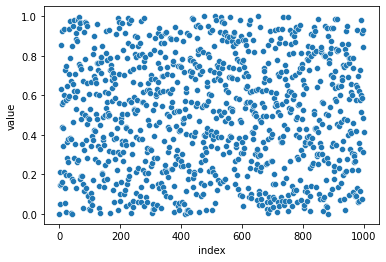

In [23]:
sns.scatterplot(x="index", y="value", data=df)

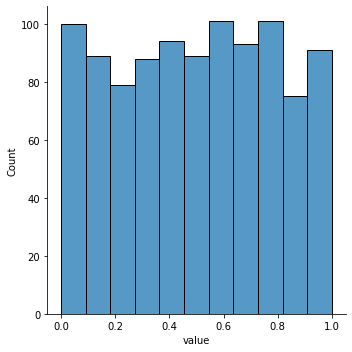

In [24]:
sns.displot(df["value"])

4. 请编写一个产生状态随机数序列的函数, 并用直方图来验证(画图函数随意)

In [25]:
def randn(count, mu=0, sigma=1, seed=1, n=12):
    randn = []
    _rand = rand(count * n, seed)
    for i in range(count):
        y = mu + sigma * (sum(_rand[n*i:n*(i+1)]) - n / 2) / math.sqrt(n / 12)
        randn.append(y)
    return randn

In [26]:
count = 1000
df = pd.DataFrame(
    {
        "index": range(count),
        "value": randn(count)
    }
)

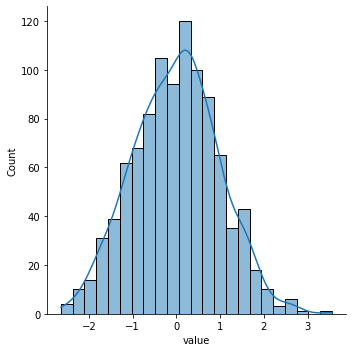

In [27]:
sns.displot(df["value"], kde=True)

5. 全部利用前面自编的函数产生2 维随机游走, 并画出轨迹图(画图函数随意)

In [28]:
s = turtle.getscreen()
t = turtle.Turtle()

steps = 1000
x = randn(steps, seed=0)
y = randn(steps, seed=1)
x0 = 0
y0 = 0
for i, j in zip(x, y):
    x0 += i
    y0 += j
    t.goto(x0 * 10, y0 * 10)
    time.sleep(0.1)
turtle.done()

TclError: invalid command name ".!canvas"